In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns


### Question 4
Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN


### Question 5
How many rows and columns are in `gdp_df`? What are the data types of each column?

In [3]:
gdp_df.shape

(7176, 4)

In [4]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

### Question 6
Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [5]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes')
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [6]:
gdp_df = gdp_df.rename(columns = {'Country or Area' : 'Country', "Value" : 'GDP_Per_Capita'})
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [7]:
gdp_countries = gdp_df.Country.value_counts()
gdp_countries

Least developed countries: UN classification    31
Niger                                           31
Middle East & North Africa (IDA & IBRD)         31
Middle income                                   31
Mongolia                                        31
                                                ..
Kosovo                                          13
Turks and Caicos Islands                        10
Sint Maarten (Dutch part)                       10
Somalia                                          8
Djibouti                                         8
Name: Country, Length: 242, dtype: int64

In [8]:
type(gdp_countries)

pandas.core.series.Series

In [9]:
gdp_countries = gdp_countries.to_frame()

In [10]:
type(gdp_countries)

pandas.core.frame.DataFrame

In [11]:
gdp_countries = gdp_countries.reset_index()
gdp_countries

,index,Country
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31
...,...,...
237,Kosovo,13
238,Turks and Caicos Islands,10
239,Sint Maarten (Dutch part),10
240,Somalia,8


In [12]:
gdp_countries.columns = ['Country', 'Years']
gdp_countries.head()

,Country,Years
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31


In [13]:
gdp_countries.sort_values(by = 'Years', ascending = False)

,Country,Years
0,Least developed countries: UN classification,31
141,Algeria,31
131,East Asia & Pacific,31
132,East Asia & Pacific (excluding high income),31
133,East Asia & Pacific (IDA & IBRD),31
...,...,...
237,Kosovo,13
238,Turks and Caicos Islands,10
239,Sint Maarten (Dutch part),10
240,Somalia,8


### Question 7
How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [14]:
countries_gdp_count=gdp_df.Country.value_counts().to_frame()
countries_gdp_count

,Country
Least developed countries: UN classification,31
Niger,31
Middle East & North Africa (IDA & IBRD),31
Middle income,31
Mongolia,31
...,...
Kosovo,13
Turks and Caicos Islands,10
Sint Maarten (Dutch part),10
Somalia,8


In [15]:
gdp_countries = gdp_countries.reset_index()

In [16]:
count = len(gdp_countries[gdp_countries['Years'] == 31])
count

205

In [17]:
len(gdp_countries[gdp_countries['Years'] != 31])

37

### Question 8
Show the distribution of GDP per capita for the year 2020. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [18]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [20]:
gdp_2020 = gdp_df.loc[gdp_df.Year == 2020]
gdp_2020 = gdp_2020.reset_index()
gdp_2020

,index,Country,Year,GDP_Per_Capita
0,0,Afghanistan,2020,1970.560169
1,19,Africa Eastern and Southern,2020,3491.978104
2,50,Africa Western and Central,2020,4021.293919
3,81,Albania,2020,13253.733337
4,112,Algeria,2020,10735.382539
...,...,...,...,...
235,7025,Vietnam,2020,10338.270543
236,7056,West Bank and Gaza,2020,5402.538773
237,7083,World,2020,16269.969854
238,7114,Zambia,2020,3277.816510


array([[<Axes: title={'center': 'GDP_Per_Capita'}>]], dtype=object)

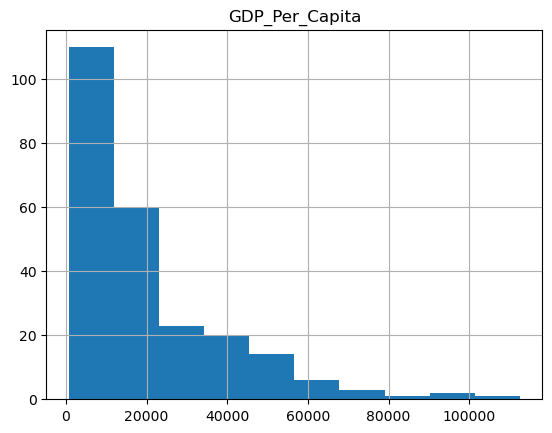

In [21]:
gdp_2020.hist('GDP_Per_Capita')

<Axes: >

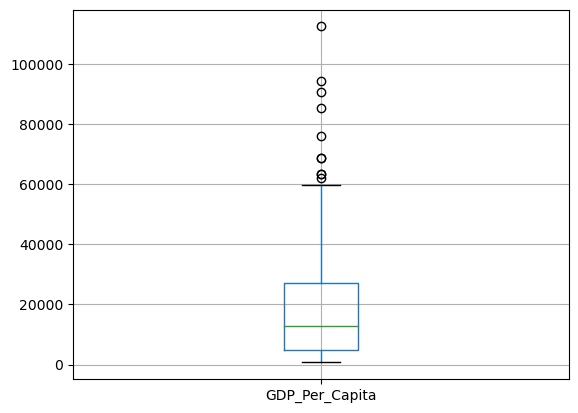

In [22]:
gdp_2020.boxplot('GDP_Per_Capita')

<Axes: xlabel='GDP_Per_Capita'>

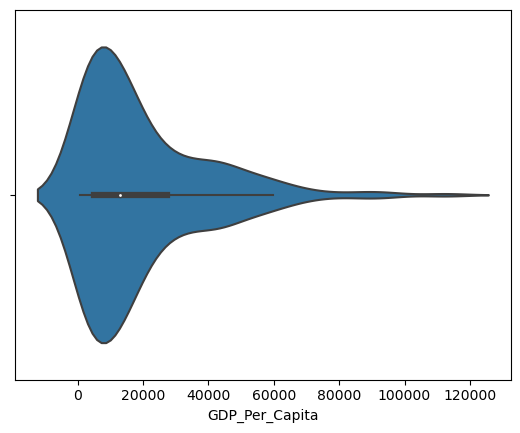

In [24]:
sns.violinplot(x = 'GDP_Per_Capita', data = gdp_2020)

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

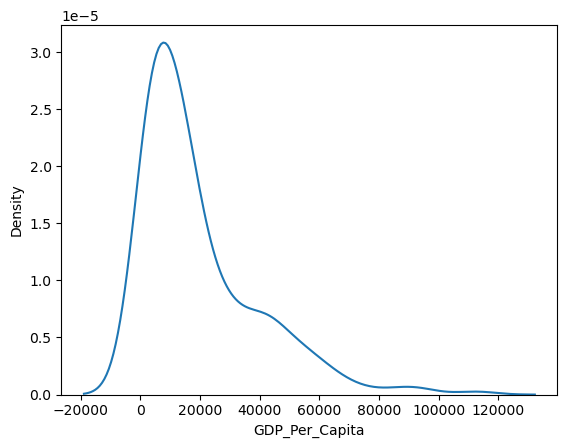

In [25]:
sns.kdeplot( x = 'GDP_Per_Capita', data = gdp_2020)

### Question 9
What was the median GDP per capita value in 2020?

In [27]:
gdp_2020.GDP_Per_Capita.median()

12908.9374056206

### Question 10
For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [28]:
gdp_decades = gdp_df.loc[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
gdp_decades

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
10,Afghanistan,2010,1957.029070
19,Africa Eastern and Southern,2020,3491.978104
29,Africa Eastern and Southern,2010,3545.205203
39,Africa Eastern and Southern,2000,2915.472987
...,...,...,...
7144,Zambia,1990,2190.181724
7145,Zimbabwe,2020,2134.555461
7155,Zimbabwe,2010,1813.531764
7165,Zimbabwe,2000,2771.060576


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

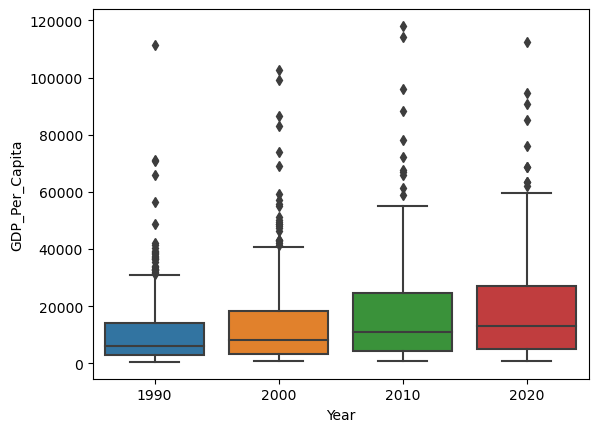

In [29]:
sns.boxplot( x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"] )

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

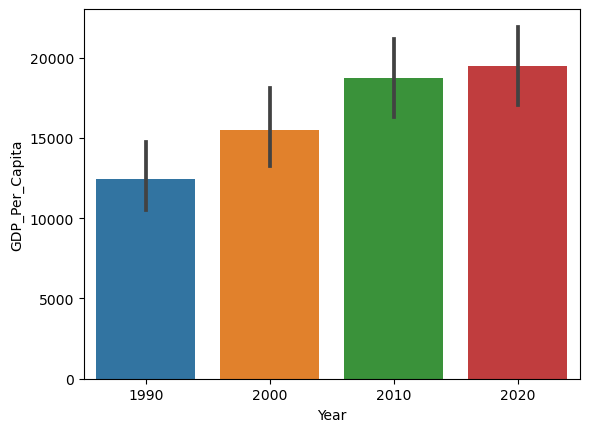

In [31]:
sns.barplot(x = 'Year', y = 'GDP_Per_Capita', data = gdp_decades)

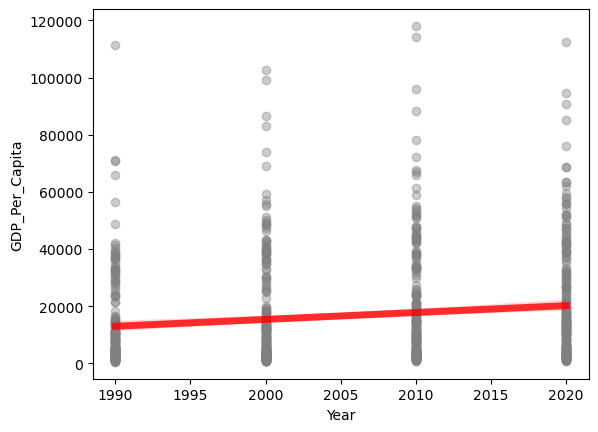

In [34]:
sns.regplot(x=gdp_decades.Year, y=gdp_decades.GDP_Per_Capita,
            scatter_kws={'color':'grey', 'alpha':0.4}, line_kws={'color':'red', 'alpha':0.8, 'lw':5})
plt.show()

### Question 11
Which country was the first to have a GDP per capita greater than $100,000?

In [35]:
first_country = gdp_df.loc[gdp_df['GDP_Per_Capita']>100000].sort_values(by='Year', ascending=True)
first_country

,Country,Year,GDP_Per_Capita
6838,United Arab Emirates,1990,111454.055665
6837,United Arab Emirates,1991,106103.552655
6836,United Arab Emirates,1992,103470.924576
6834,United Arab Emirates,1994,100213.156226
6833,United Arab Emirates,1995,101570.992100
6832,United Arab Emirates,1996,102211.638844
6831,United Arab Emirates,1997,105108.996265
6830,United Arab Emirates,1998,100100.435658
6828,United Arab Emirates,2000,102494.714624
3901,Luxembourg,2001,101143.147977


gdp_df.loc[gdp_df['GDP_Per_Capita']>100000].sort_values('Year').head(1)

### Question 12
Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [38]:
gdp_2020.max().GDP_Per_Capita

112557.309471818

In [36]:
gdp_2020.sort_values("GDP_Per_Capita", ascending=False)

,index,Country,Year,GDP_Per_Capita
130,3882,Luxembourg,2020,112557.309472
192,5720,Singapore,2020,94505.636160
102,3071,Ireland,2020,90789.221024
180,5381,Qatar,2020,85290.450430
21,639,Bermuda,2020,76105.138057
...,...,...,...,...
159,4750,Niger,2020,1221.269930
197,5871,Somalia,2020,1180.965971
51,1524,Dem. Rep. Congo,2020,1082.445242
38,1136,Central African Republic,2020,937.856470


In [37]:
gdp_lux = gdp_df.loc[gdp_df['Country']=='Luxembourg']
gdp_lux

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472
3883,Luxembourg,2019,116518.276815
3884,Luxembourg,2018,115049.926079
3885,Luxembourg,2017,114985.842236
3886,Luxembourg,2016,116283.699681
3887,Luxembourg,2015,113182.728563
3888,Luxembourg,2014,113313.578898
3889,Luxembourg,2013,113050.663254
3890,Luxembourg,2012,112137.135491
3891,Luxembourg,2011,112998.390477


Text(0.5, 1.0, 'GDP Luxembourg 1990-2020')

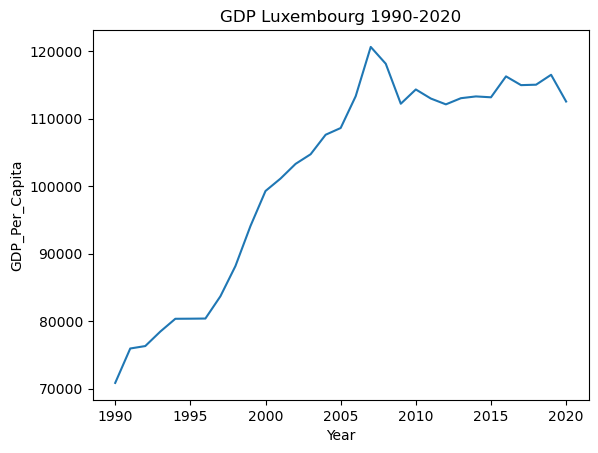

In [39]:
plt.plot('Year', 'GDP_Per_Capita', data=gdp_lux)
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita')
plt.title("GDP Luxembourg 1990-2020")

### Question 13
Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [40]:
gdp_2020.sort_values(by="GDP_Per_Capita", ascending=True)

,index,Country,Year,GDP_Per_Capita
30,914,Burundi,2020,731.064074
38,1136,Central African Republic,2020,937.856470
51,1524,Dem. Rep. Congo,2020,1082.445242
197,5871,Somalia,2020,1180.965971
159,4750,Niger,2020,1221.269930
...,...,...,...,...
21,639,Bermuda,2020,76105.138057
180,5381,Qatar,2020,85290.450430
102,3071,Ireland,2020,90789.221024
192,5720,Singapore,2020,94505.636160


In [41]:
gdp_bur = gdp_df.loc[gdp_df['Country']=='Burundi']
gdp_bur

,Country,Year,GDP_Per_Capita
914,Burundi,2020,731.064074
915,Burundi,2019,751.443405
916,Burundi,2018,761.524143
917,Burundi,2017,773.572859
918,Burundi,2016,794.604340
919,Burundi,2015,825.205574
920,Burundi,2014,886.235296
921,Burundi,2013,877.272857
922,Burundi,2012,862.715651
923,Burundi,2011,852.502576


<Axes: xlabel='Year'>

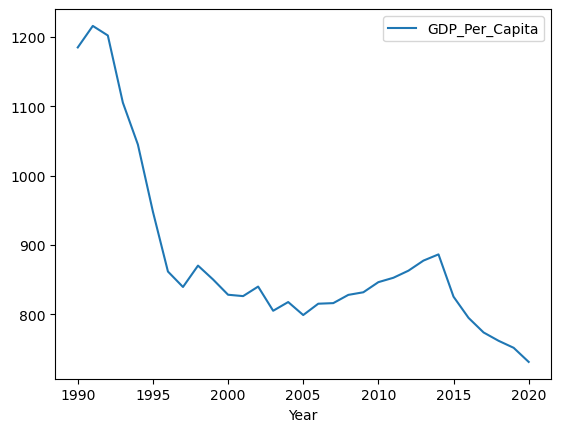

In [43]:
gdp_bur.plot('Year', 'GDP_Per_Capita')

In [44]:
gdp_1990 = gdp_df.loc[gdp_df.Year == 1990]

In [45]:
merged_1990_2020 = pd.merge(gdp_1990, gdp_2020, on = 'Country', how = 'inner')

In [48]:
merged_1990_2020.loc[merged_1990_2020.GDP_Per_Capita_y < merged_1990_2020.GDP_Per_Capita_x]['Country']

9                                         Aruba
15                                     Barbados
25                                       Brunei
28                                      Burundi
33                     Central African Republic
39                                      Comoros
40                                        Congo
44                              Dem. Rep. Congo
65     Fragile and conflict affected situations
67                                        Gabon
75                                Guinea-Bissau
77                                        Haiti
98                                     Kiribati
100                             Kyrgyz Republic
114                                  Madagascar
143                                        Oman
182                                  Tajikistan
185                                 The Bahamas
186                                  The Gambia
193                                     Ukraine
194                        United Arab E

### Question 14
Read in the internet use dataset into a DataFrame named `internet_df`. Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [49]:
internet_df = pd.read_csv('../data/internet_use.csv',nrows=4495)
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


In [50]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

### Question 15
Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [51]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])
internet_df

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [52]:
internet_df = internet_df.rename(columns = {'Country or Area' : 'Country', "Value" : 'Internet_Users_Pct'})
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


### Question 16
Look at the number of observations in this dataset per year. What do you notice?

--As the year increases, so does the amount of users in the country

### Question 17 
What is the first year to have a non-zero internet users percentage value?

In [54]:
internet_df.loc[internet_df.Internet_Users_Pct !=0.00].sort_values(by='Year', ascending=True).reset_index(drop=True)

,Country,Year,Internet_Users_Pct
0,Italy,1990,0.017545
1,Denmark,1990,0.097277
2,Belgium,1990,0.001007
3,Finland,1990,0.401088
4,United States,1990,0.784729
...,...,...,...
4101,Kiribati,2014,12.250000
4102,Colombia,2014,52.570000
4103,Ethiopia,2014,2.900000
4104,Burundi,2014,1.380000


### Question 18
How does the distribution of internet users percent differ for 2000 and 2014?

In [55]:
internet_years = internet_df.loc[internet_df['Year'].isin([2000, 2014])]
internet_years

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
15,Albania,2014,60.100000
29,Albania,2000,0.114097
36,Algeria,2014,18.090000
50,Algeria,2000,0.491706
...,...,...,...
4445,Yemen,2000,0.082500
4451,Zambia,2014,17.340000
4465,Zambia,2000,0.191072
4473,Zimbabwe,2014,19.890000


<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

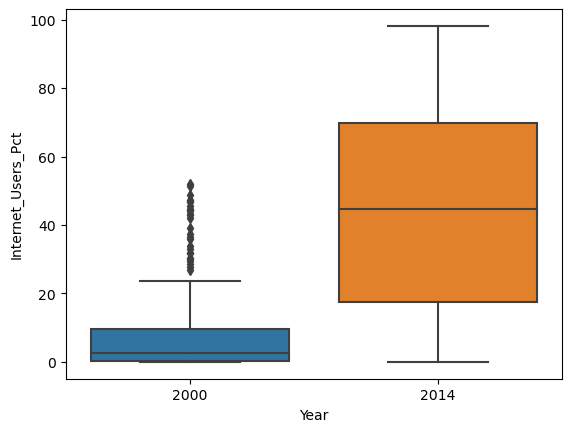

In [56]:
sns.boxplot( x=internet_years["Year"], y=internet_years["Internet_Users_Pct"] )

### Question 19
For how many countries was the percentage of internet users below 5% in 2014?

In [57]:
internet_below = internet_df.loc[(internet_df['Year'] == 2014) & (internet_df['Internet_Users_Pct'] < 5)]
internet_below.Country.count()

16

### Question 20
Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [60]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on= ['Country','Year'], how= 'outer')
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN


### Question 21
Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [61]:
top_3 = gdp_and_internet_use.loc[gdp_and_internet_use['Year']==2014]
top_3 = top_3.sort_values(by='Internet_Users_Pct', ascending=False).head(3)
#top_3 = top_3.nlargest(3, 'Internet_Users_Pct')
top_3

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2803,Iceland,2014,50450.741612,98.16
645,Bermuda,2014,77361.104881,96.80
4880,Norway,2014,62390.130313,96.30


In [62]:
gdp_top_3 = gdp_and_internet_use.loc[gdp_and_internet_use['Country'].isin(['Iceland','Bermuda', 'Norway'])]
gdp_top_3

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
639,Bermuda,2020,76105.138057,NaN
640,Bermuda,2019,81681.726668,NaN
641,Bermuda,2018,81423.408453,NaN
642,Bermuda,2017,81834.955874,NaN
643,Bermuda,2016,78149.352535,NaN
...,...,...,...,...
7670,Iceland,1994,NaN,6.794812
7671,Iceland,1993,NaN,2.667825
7672,Iceland,1992,NaN,1.539160
7673,Iceland,1991,NaN,0.505129


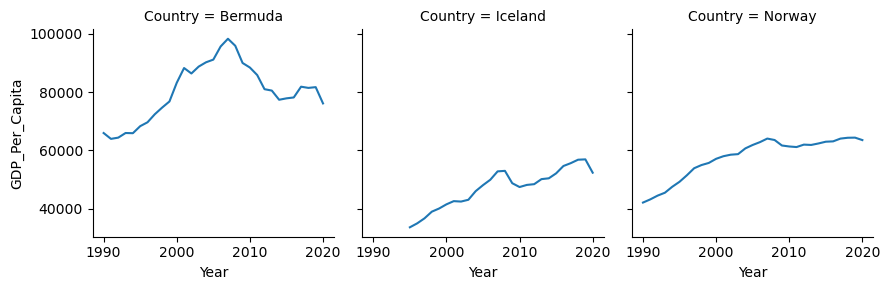

In [65]:
g = sns.FacetGrid(gdp_top_3, col="Country")
g.map(sns.lineplot, 'Year', 'GDP_Per_Capita')


### Question 22
Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [66]:
gdp_and_internet_use_2014 = gdp_and_internet_use.loc[gdp_and_internet_use.Year == 2014]
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6,Afghanistan,2014,2102.384604,6.39
25,Africa Eastern and Southern,2014,3677.319414,NaN
56,Africa Western and Central,2014,4215.646000,NaN
87,Albania,2014,11586.833878,60.10
118,Algeria,2014,11512.690472,18.09
...,...,...,...,...
8147,Turkey,2014,NaN,51.04
8170,Venezuela,2014,NaN,57.00
8194,Viet Nam,2014,NaN,48.31
8214,Virgin Islands (U.S.),2014,NaN,50.07


### Question 23
Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

<Axes: xlabel='Internet_Users_Pct', ylabel='GDP_Per_Capita'>

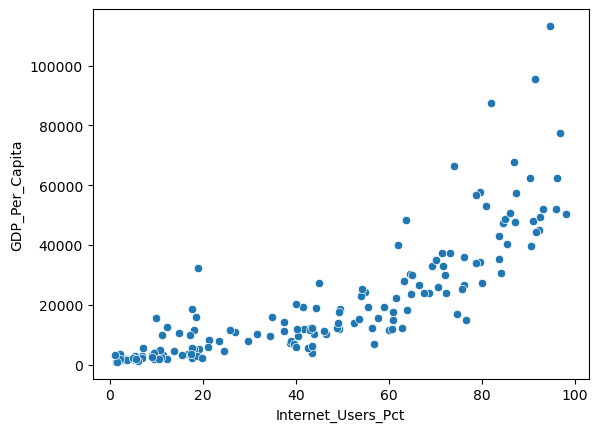

In [68]:
sns.scatterplot(data=gdp_and_internet_use_2014, x="Internet_Users_Pct", y="GDP_Per_Capita")

In [81]:
gdp_and_internet_use_2014['GDP_Group'] = pd.qcut(x = gdp_and_internet_use_2014.GDP_Per_Capita, q = 3, labels = ['Low', 'Medium', 'High'])

C:\Users\ajwil\AppData\Local\Temp\ipykernel_61512\2474211783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['GDP_Group'] = pd.qcut(x = gdp_and_internet_use_2014.GDP_Per_Capita, q = 3, labels = ['Low', 'Medium', 'High'])


In [82]:
gdp_and_internet_use_2014


,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_Group
6,Afghanistan,2014,2102.384604,6.39,Low
25,Africa Eastern and Southern,2014,3677.319414,NaN,Low
56,Africa Western and Central,2014,4215.646000,NaN,Low
87,Albania,2014,11586.833878,60.10,Medium
118,Algeria,2014,11512.690472,18.09,Medium
...,...,...,...,...,...
8147,Turkey,2014,NaN,51.04,NaN
8170,Venezuela,2014,NaN,57.00,NaN
8194,Viet Nam,2014,NaN,48.31,NaN
8214,Virgin Islands (U.S.),2014,NaN,50.07,NaN


In [83]:
gdp_and_internet_use_2014.groupby('GDP_Group')['Internet_Users_Pct'].median()

GDP_Group
Low       10.60
Medium    43.00
High      78.74
Name: Internet_Users_Pct, dtype: float64